# Aprendizaje No Supervisado

## K Modes

K Modes o K Modas Clustering es un algoritmo de aprendizaje no supervisado que intenta agrupar datos en función de su similitud al igual que K Medias, pero especificamente para variables categoricas. En esencia el proceso es lo mismo que K Medias pero hace un paso interno de transformación de las variables en dummies o variables indicativas binarias para todas las etiquetas (posibles valores que puede tomar una variable).

Para esta ocasión trabajaremos con un dataset de vestidos, trataremos de agrupar los vestidos por sus características

In [1]:
#La librería que utilizaremos es kmodes
#pip install kmodes

# Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Obtención de Datos

In [3]:
df = pd.read_excel('Attribute DataSet.xlsx')

In [4]:
df.head()

,Style,Price,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type
0,Brief,Average,Spring,o-neck,full,natural,silk,chiffon,embroidary,print
1,cute,Low,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot
2,Flare,Average,Spring,v-neck,short,empire,cotton,broadcloth,beading,solid
3,party,Average,Summer,o-neck,full,natural,polyster,broadcloth,lace,solid
4,cute,Low,Automn,o-neck,sleevless,natural,polyster,chiffon,sashes,striped


# Exploración inicial

In [5]:
df.isnull().sum()

Style           0
Price           1
Season          0
NeckLine        1
SleeveLength    0
waiseline       1
Material        1
FabricType      1
Decoration      1
Pattern Type    1
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Style           0
Price           0
Season          0
NeckLine        0
SleeveLength    0
waiseline       0
Material        0
FabricType      0
Decoration      0
Pattern Type    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Style         99 non-null     object
 1   Price         99 non-null     object
 2   Season        99 non-null     object
 3   NeckLine      99 non-null     object
 4   SleeveLength  99 non-null     object
 5   waiseline     99 non-null     object
 6   Material      99 non-null     object
 7   FabricType    99 non-null     object
 8   Decoration    99 non-null     object
 9   Pattern Type  99 non-null     object
dtypes: object(10)
memory usage: 8.5+ KB


In [9]:
df.describe()

,Style,Price,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type
count,99,99,99,99,99,99,99,99,99,99
unique,11,6,6,10,7,2,13,13,17,7
top,Casual,Average,Spring,o-neck,sleevless,natural,cotton,chiffon,lace,solid
freq,45,48,30,57,41,79,28,50,19,62


# Creando los clusters (grupos)

K Mode tiene varios "inicializadores (init)" los cuales son hiperparametros para el algoritmo que determinan como calcularán la disimilitud entre variables. Este es el hiperaparametro más importante del algoritmo. 

- 'Huang': Method in Huang [1997, 1998]
- 'Cao': Method in Cao et al. [2009]
- 'random': elige 'n_clusters' de las observaciones (filas) de manera aleatoria en los datos para los centroides iniciales.

En este link pueden tener más información sobre los hiperparametros de este algoritmo:

https://medium.com/@shailja.nitp2013/k-modesclustering-ef6d9ef06449

Para nuestro proyecto probaremos los 3 metodos para ver la diferencia en la selección de grupos.

In [10]:
from kmodes.kmodes import KModes

# Cao

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 531.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7, cost: 495.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15, cost: 454.0
Run 1, iteration: 2/100, moves: 3, cost: 454.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16, cost: 436.0
Run 1, iteration: 2/100, moves: 15, cost: 405.0
Run 1, iteration: 3/100, moves: 11, cost: 405.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16, cost: 415.0
Run 1, iteration: 2/100, moves: 25, cost: 390.0
Run 1, iteration: 3/100, moves: 4, cost: 387.0
Run 1, iteration: 4/100, moves: 0, cost: 387.0
Init: initializing centroids
Init: initializing clusters
Starting iterations.

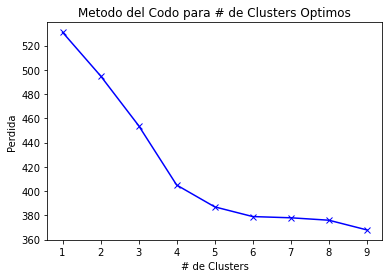

In [11]:
perdida = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    perdida.append(kmode.cost_)
    
plt.plot(K, perdida, 'bx-')
plt.xlabel('# de Clusters')
plt.ylabel('Perdida')
plt.title('Metodo del Codo para # de Clusters Optimos')
plt.show()

# Huang

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 531.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 25, cost: 484.0
Run 1, iteration: 2/100, moves: 5, cost: 484.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 25, cost: 462.0
Run 1, iteration: 2/100, moves: 2, cost: 462.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 27, cost: 419.0
Run 1, iteration: 2/100, moves: 6, cost: 419.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19, cost: 397.0
Run 1, iteration: 2/100, moves: 8, cost: 395.0
Run 1, iteration: 3/100, moves: 0, cost: 395.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 25, cost: 401.

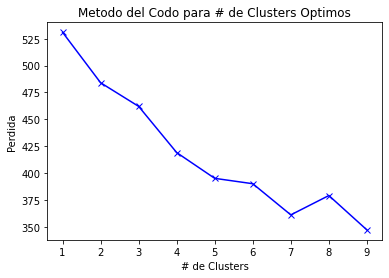

In [12]:
perdida = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    perdida.append(kmode.cost_)
    
plt.plot(K, perdida, 'bx-')
plt.xlabel('# de Clusters')
plt.ylabel('Perdida')
plt.title('Metodo del Codo para # de Clusters Optimos')
plt.show()

# Random

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 531.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23, cost: 486.0
Run 1, iteration: 2/100, moves: 0, cost: 486.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 30, cost: 433.0
Run 1, iteration: 2/100, moves: 7, cost: 432.0
Run 1, iteration: 3/100, moves: 0, cost: 432.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 27, cost: 413.0
Run 1, iteration: 2/100, moves: 4, cost: 413.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32, cost: 398.0
Run 1, iteration: 2/100, moves: 1, cost: 398.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 21, cost: 398.

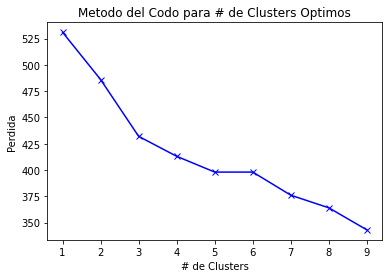

In [13]:
perdida = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Random", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    perdida.append(kmode.cost_)
    
plt.plot(K, perdida, 'bx-')
plt.xlabel('# de Clusters')
plt.ylabel('Perdida')
plt.title('Metodo del Codo para # de Clusters Optimos')
plt.show()

El metodo que aparenta mayor estabilidad es el Cao, usemos ese para nuestro ejercicio.

In [14]:
#instanciamos el modelo con la cantidad de cluster seleccionados
kmode = KModes(n_clusters=4, init = "Cao", n_init = 1, verbose=1)

In [15]:
kmode

KModes(n_clusters=4, verbose=1)

In [16]:
#agregamos la columna con los clusters para cada observacion (fila)
df['cluster'] = kmode.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16, cost: 436.0
Run 1, iteration: 2/100, moves: 15, cost: 405.0
Run 1, iteration: 3/100, moves: 11, cost: 405.0


In [17]:
#Cantidad de vestidos por cluster
df['cluster'].value_counts()

0    52
3    20
1    16
2    11
Name: cluster, dtype: int64

In [18]:
df.head()

,Style,Price,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,cluster
0,Brief,Average,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,0
1,cute,Low,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,2
2,Flare,Average,Spring,v-neck,short,empire,cotton,broadcloth,beading,solid,1
3,party,Average,Summer,o-neck,full,natural,polyster,broadcloth,lace,solid,1
4,cute,Low,Automn,o-neck,sleevless,natural,polyster,chiffon,sashes,striped,0


In [19]:
df['cluster'] = kmode.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22, cost: 405.0
Run 1, iteration: 2/100, moves: 1, cost: 405.0


In [20]:
df_cluster = pd.DataFrame(kmode.cluster_centroids_)
df_cluster.columns = df.columns

In [21]:
df_cluster

,Style,Price,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,cluster
0,Casual,Average,Spring,o-neck,sleevless,natural,polyster,chiffon,sashes,solid,0
1,Casual,Average,Winter,v-neck,short,natural,polyster,broadcloth,lace,solid,1
2,Casual,Low,Summer,v-neck,sleevless,natural,cotton,worsted,lace,solid,3
3,cute,Low,Summer,o-neck,short,empire,chiffonfabric,chiffon,bow,dot,2


# K Prototype

Este algoritmo es la combinación de K Mode y K Means, podemos usarlo para datasets con variables categoricas como numericas.

https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb

https://medium.com/analytics-vidhya/customer-segmentation-using-k-prototypes-algorithm-in-python-aad4acbaaede